In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()  # may be positive , negative ,zero

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Removing missing value 
in this case 6 horsepower value 

In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

# Data visualization 



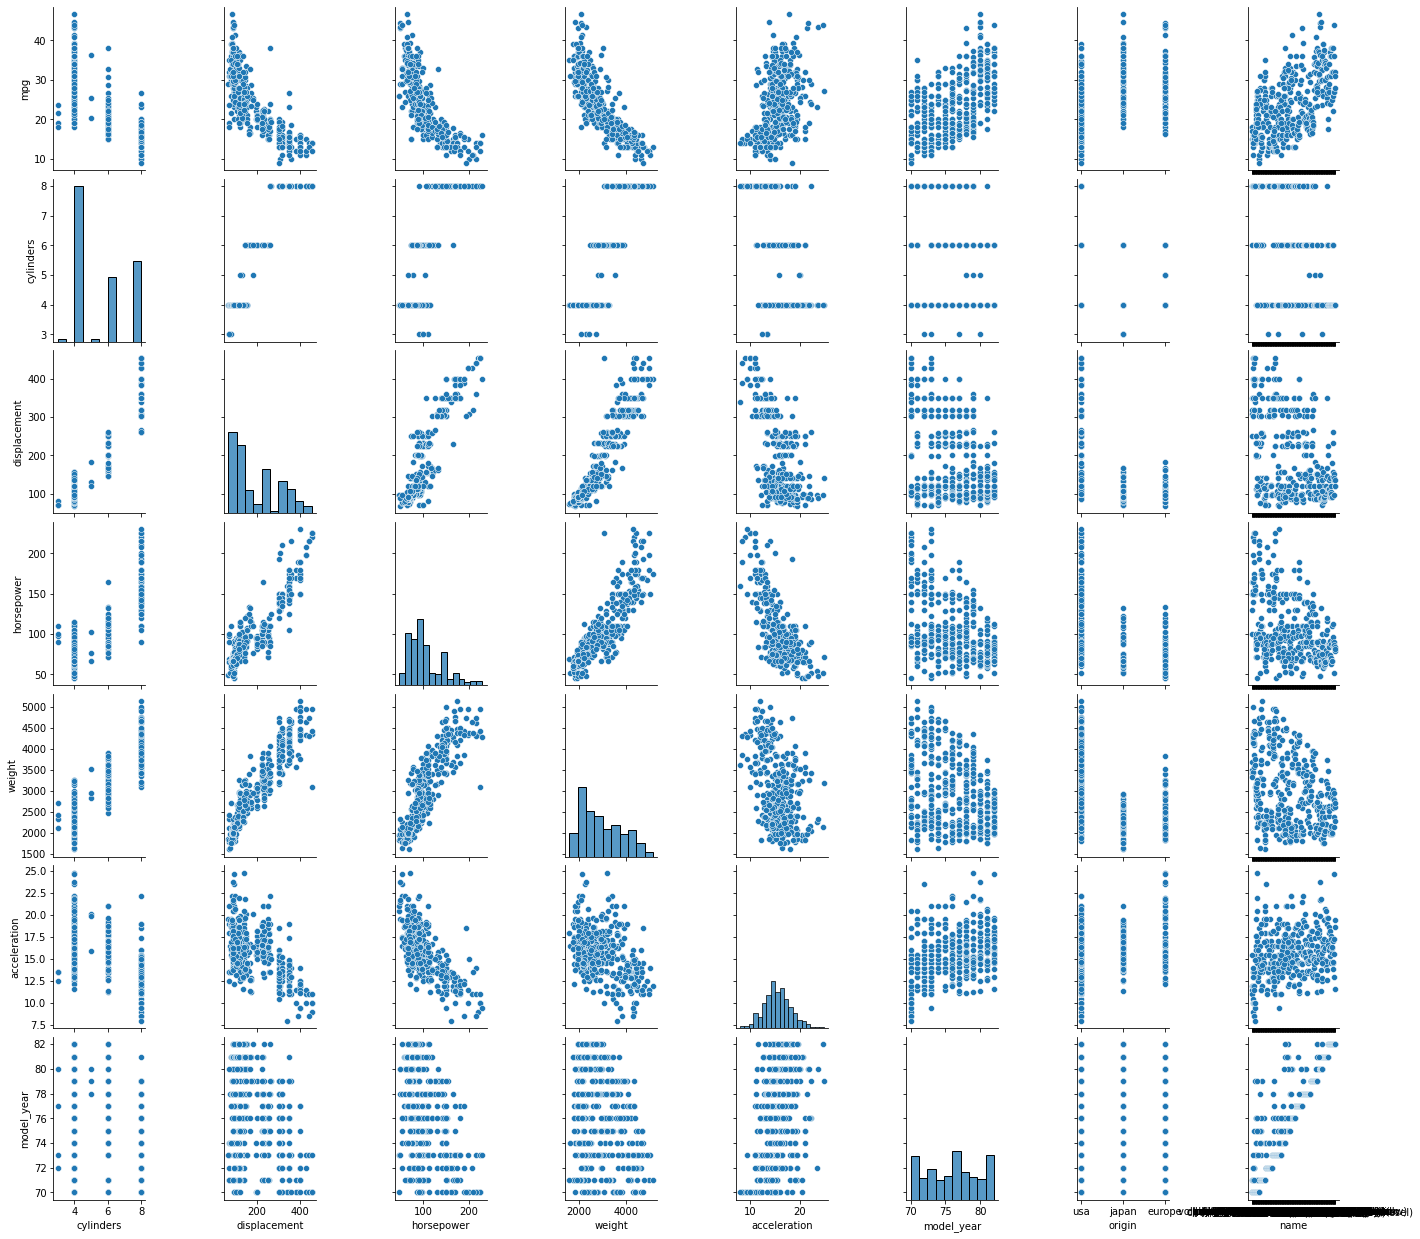

In [ ]:
sns.pairplot(df, x_vars= ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'])

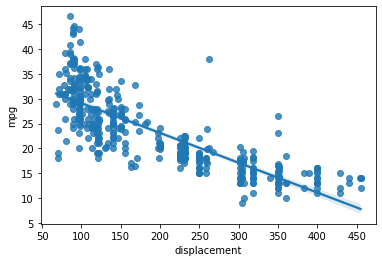

In [ ]:
sns.regplot(x = 'displacement' ,y= 'mpg', data = df)

#Define Target Variable y and feature x

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y =df[['mpg']]

In [ ]:
y.shape

(392, 1)

In [ ]:
x =df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [ ]:
x.shape

(392, 4)

#Scaling Data

In [ ]:
from sklearn.preprocessing  import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
#y = ss.fit_transform(y)
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

# Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x,y,train_size= 0.7  ,random_state = 2529) # random_state = any number (to fixed  the combination number of random combination ) stratify will ensure that there is equalno.of 1 and 0 in train and test set

In [ ]:
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((274, 4), (118, 4), (274, 1), (118, 1))

# Linear Regression Model

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
lr.intercept_

array([23.48573856])

In [ ]:
lr.coef_

array([[-1.05767743, -1.68734727, -4.10787617, -0.11495177]])


#Calculation mpg

mileage = 23.45 - 1.05*Displacement - 1.68*Horsepower -4.10*weight - 0.11*Aceleration + error

# Predict Test Data

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
y_predict

array([[18.51865637],
       [15.09305675],
       [14.30128789],
       [23.6753321 ],
       [29.7546115 ],
       [23.68796629],
       [26.61066644],
       [24.56692437],
       [15.06260986],
       [11.94312046],
       [24.08050053],
       [27.96518468],
       [31.66130278],
       [31.01309132],
       [18.32428976],
       [19.32795009],
       [28.08847536],
       [32.1506879 ],
       [31.15859692],
       [27.15792144],
       [18.82433097],
       [22.54580176],
       [26.15598115],
       [32.36393869],
       [20.74377679],
       [ 8.78027518],
       [22.19699435],
       [18.20614294],
       [25.00052718],
       [15.26421552],
       [23.13441082],
       [17.10542257],
       [ 9.87180062],
       [30.00790415],
       [20.41204655],
       [29.11860245],
       [24.4305187 ],
       [21.72601835],
       [10.51174626],
       [13.12426391],
       [21.41938406],
       [19.96113872],
       [ 6.19146626],
       [17.79025345],
       [22.5493033 ],
       [29

# Model Accuracy 


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score  # Evaluating


In [ ]:
mean_absolute_error(y_test,y_predict)

3.3286968643244106

In [ ]:
mean_absolute_percentage_error(y_test, y_predict)

0.14713035779536746

In [ ]:
r2_score(y_test,y_predict)

0.7031250746717692

#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree =2 , interaction_only = True ,include_bias=False )

In [ ]:
x_train2 = poly.fit_transform(x_train)

In [ ]:
x_test2 =poly.fit_transform(x_test)

In [ ]:
lr.fit(x_train2 , y_train)


LinearRegression()

In [ ]:
lr.intercept_

array([21.2733645])

In [ ]:
lr.coef_

array([[-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
        -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398]])

In [ ]:
y_predict_poly = lr.predict(x_test2)

#Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score  # Evaluating

In [ ]:
mean_absolute_error(y_test,y_predict_poly)

2.7887147720295977

In [ ]:
mean_absolute_percentage_error(y_test, y_predict_poly)

0.1207401834293869

In [ ]:
r2_score(y_test,y_predict_poly)

0.7461731314563803

#Hand Written prediction

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

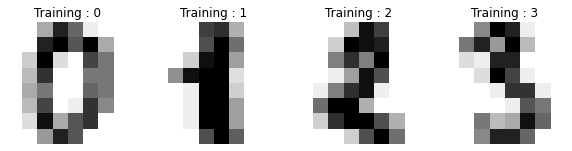

In [ ]:
_, axes = plt.subplots(nrows =1 , ncols = 4, figsize=(10,3))
for ax,image, label in zip(axes , df.images ,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap =plt.cm.gray_r , interpolation = 'nearest')
  ax.set_title("Training : %i" % label)


In [ ]:
df.images.shape

(1797, 8, 8)

#Data Preprocessing

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
n_samples = len(df.images)
data = df.images.reshape(n_samples,-1)  # flattened

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data.shape

(1797, 64)

# Scaling Data 

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

# Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,df.target , test_size= 0.3  ,random_state = 12529) # random_state = any number (to fixed  the combination number of random combination ) stratify will ensure that there is equalno.of 1 and 0 in train and test set

In [ ]:
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Predict Test Data

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([0, 1, 2, 2, 5, 8, 7, 5, 3, 1, 4, 1, 8, 6, 6, 5, 9, 6, 2, 8, 3, 2,
       5, 1, 8, 3, 1, 7, 8, 9, 0, 7, 6, 1, 3, 1, 5, 3, 9, 8, 1, 8, 6, 5,
       4, 8, 2, 1, 7, 7, 4, 4, 7, 9, 0, 6, 3, 7, 6, 6, 0, 3, 1, 1, 3, 9,
       2, 6, 0, 5, 4, 5, 0, 3, 5, 2, 2, 8, 5, 3, 7, 6, 5, 2, 0, 7, 6, 0,
       7, 6, 0, 4, 4, 6, 8, 4, 0, 2, 8, 0, 6, 1, 5, 4, 2, 2, 4, 2, 3, 4,
       0, 4, 8, 6, 2, 0, 4, 0, 5, 4, 5, 4, 5, 2, 4, 5, 2, 5, 4, 7, 9, 8,
       1, 4, 4, 8, 7, 5, 1, 2, 4, 2, 1, 5, 8, 3, 3, 0, 0, 1, 0, 9, 1, 8,
       9, 2, 0, 8, 3, 7, 3, 5, 4, 2, 9, 2, 7, 1, 0, 6, 4, 1, 9, 9, 6, 8,
       3, 7, 1, 6, 4, 8, 3, 7, 1, 0, 5, 7, 7, 9, 0, 0, 5, 1, 7, 9, 2, 0,
       5, 1, 0, 0, 7, 9, 6, 3, 6, 8, 2, 8, 1, 2, 3, 3, 3, 7, 1, 7, 9, 1,
       3, 0, 4, 5, 6, 7, 9, 1, 2, 0, 5, 3, 3, 0, 0, 0, 3, 7, 6, 4, 8, 4,
       9, 1, 5, 0, 0, 1, 6, 9, 8, 6, 8, 7, 5, 7, 1, 6, 7, 7, 6, 9, 5, 7,
       1, 1, 1, 7, 4, 3, 5, 0, 9, 2, 2, 4, 3, 2, 9, 7, 9, 2, 6, 3, 9, 2,
       0, 5, 7, 8, 2, 6, 7, 7, 0, 1, 1, 4, 2, 9, 0,

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  1],
       [ 0,  0,  2,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.98      0.98      0.98        59
           2       0.96      0.98      0.97        49
           3       1.00      0.94      0.97        54
           4       0.98      0.98      0.98        50
           5       0.96      0.98      0.97        51
           6       1.00      0.97      0.98        59
           7       0.97      0.98      0.98        60
           8       1.00      0.94      0.97        54
           9       0.93      1.00      0.96        50

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

